In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import os 
from models.unet import UNet


In [79]:
os.listdir('trained_model')

['unet_midv_21.pt',
 'unet_midv_adam_75.pt',
 'unet_midv_adam_60.pt',
 'unet_midv_adam_95.pt',
 'unet_midv_17.pt',
 'unet_midv_12.pt',
 'unet_midv_18.pt',
 'unet_midv_1.pt',
 'unet_midv_adam_5.pt',
 'unet_midv_9.pt',
 'unet_midv_adam_30.pt',
 'unet_midv_adam_105.pt',
 'unet_midv_11.pt',
 'unet_midv_19.pt',
 'unet_midv_22.pt',
 'unet_midv_adam_55.pt',
 'unet_midv_14.pt',
 'unet_midv_8.pt',
 'unet_midv_10.pt',
 'unet_midv_15.pt',
 'unet_midv_5.pt',
 'unet_midv_adam_10.pt',
 'unet_midv_7.pt',
 'unet_midv_adam_70.pt',
 'unet_midv_adam_45.pt',
 'unet_midv_4.pt',
 'unet_midv_adam_65.pt',
 'unet_midv_adam_20.pt',
 'unet_midv_2.pt',
 'unet_midv_adam_35.pt',
 'unet_midv_adam_85.pt',
 'unet_midv_adam_80.pt',
 'unet_midv_16.pt',
 'unet_midv_adam_40.pt',
 'unet_midv_adam_100.pt',
 'unet_midv_3.pt',
 'unet_midv_24.pt',
 'unet_midv_0.pt',
 'unet_midv_adam_90.pt',
 'unet_midv_6.pt',
 'unet_midv_adam_0.pt',
 'unet_midv_adam_50.pt',
 'unet_midv_adam_15.pt',
 'unet_midv_13.pt',
 'unet_midv_adam_25.pt',


In [3]:
results = torch.load('trained_model/unet_best_0.pt')

In [4]:
results['optimizer_state_dict']

{'state': {140038780695536: {'step': 8400,
   'square_avg': tensor([[[[3.2536e-04, 3.1132e-04, 3.3531e-04],
             [2.7691e-04, 2.6383e-04, 3.0332e-04],
             [1.9774e-04, 1.8386e-04, 2.1648e-04]],
   
            [[6.7263e-04, 6.5153e-04, 6.7230e-04],
             [6.2324e-04, 6.0274e-04, 6.3151e-04],
             [5.2221e-04, 5.0884e-04, 5.2621e-04]],
   
            [[1.6561e-03, 1.6387e-03, 1.6634e-03],
             [1.6184e-03, 1.5976e-03, 1.6168e-03],
             [1.4954e-03, 1.4941e-03, 1.4943e-03]]],
   
   
           [[[9.3439e-05, 8.9940e-05, 1.0531e-04],
             [9.4825e-05, 1.0319e-04, 1.1712e-04],
             [8.9041e-05, 9.5874e-05, 1.0642e-04]],
   
            [[2.8087e-04, 2.7839e-04, 3.0214e-04],
             [2.7977e-04, 2.9689e-04, 3.1840e-04],
             [2.6106e-04, 2.7712e-04, 2.9521e-04]],
   
            [[6.3612e-04, 6.3770e-04, 6.7135e-04],
             [6.3313e-04, 6.6255e-04, 6.9073e-04],
             [6.0176e-04, 6.2996e-04, 6.5386e-

In [5]:
results['scheduler_state_dict']

{'factor': 0.1,
 'min_lrs': [0],
 'patience': 2,
 'verbose': False,
 'cooldown': 0,
 'cooldown_counter': 0,
 'mode': 'min',
 'threshold': 0.0001,
 'threshold_mode': 'rel',
 'best': 0.00011615725088631734,
 'num_bad_epochs': 0,
 'mode_worse': inf,
 'eps': 1e-08,
 'last_epoch': 2100,
 '_last_lr': [1.0000000000000004e-08]}

In [50]:
model = UNet(n_class = 1)
model.load_state_dict(results['model_state_dict'])
model = nn.Sequential(model, nn.Sigmoid())
model.eval()
model.float();
model.cuda()

Sequential(
  (0): UNet(
    (dconv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (dconv4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(i

In [51]:
torch.cuda.empty_cache()

In [52]:
# example images 
import albumentations
import matplotlib.pyplot as plt
import cv2 
import numpy as np 

image = cv2.imread('data_processed/images/{}'.format(np.random.choice(os.listdir('data_processed/images'))))
#image = transform(image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [53]:
transform = albumentations.Compose([albumentations.LongestMaxSize(max_size=768, p=1), 
                          albumentations.Normalize(p=1)], p=1)

#image, pads = pad(image, factor=768)

image = transform(image=image)["image"]
image = np.moveaxis(image, -1, 0)

In [54]:
output = model(torch.from_numpy(image).unsqueeze(0).float().cuda())

In [55]:
_image= output.squeeze(0)

In [56]:
import albumentations 
import cv2
from src.dataset import MidvDataset
from pathlib import Path 
import torch
from torch.utils.data import DataLoader 
from torch.optim import Adam 
import matplotlib.pyplot as plt

In [57]:
list_images = sorted(list(Path('data_processed/images').rglob('*.jpg')))
list_masks = sorted(list(Path('data_processed/labels').rglob('*.png')))
list_images = [str(el) for el in list_images]
list_masks = [str(el) for el in list_masks]

samples = list(zip(list_images, list_masks))
samples = [tuple(el) for el in samples]

In [58]:
dataset = MidvDataset(samples = samples, transform = albumentations.Compose( [albumentations.LongestMaxSize(max_size=128 , p=1)], p=1  ))
train_dt, test_dt = torch.utils.data.random_split(dataset,[ int(0.8* len(dataset)), int(0.2* len(dataset))])
train_loader = DataLoader(train_dt,  batch_size = 4, shuffle = True, num_workers = 0)
test_loader = DataLoader(test_dt, shuffle = True, batch_size = 4)

In [69]:
res = next(iter(train_loader))

In [70]:
out = model(res['features'].float().cuda() )
mask = res['masks'].float().cuda()

In [71]:
out_numpy = out.squeeze(0)[0][0].cpu().detach().numpy()
_mask = mask.squeeze(0)[0][0].cpu().detach().numpy()

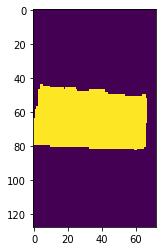

In [72]:
plt.imshow((out_numpy > 0.5))

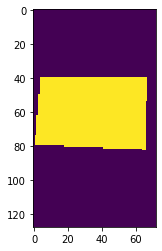

In [73]:
plt.imshow(_mask)

In [ ]:
transformed = transform(image = example_image, mask = example_mask)

In [ ]:
from pytorch_toolbelt.utils.torch_utils import tensor_from_rgb_image

In [ ]:
model(tensor_from_rgb_image(transformed['image']))

In [ ]:
import numpy as np 

In [ ]:
mask = (transformed['mask'] > 0).astype(np.uint8)

In [ ]:
np.unique(mask)

In [ ]:
mask = torch.from_numpy(mask)

In [ ]:
transform = albumentations.Compose([albumentations.LongestMaxSize(max_size=512, p=1), 
                          albumentations.Normalize(p=1)], p=1)

In [ ]:
image.shape

In [ ]:
plt.imshow(torch.from_numpy(mask).unsqueeze(0).numpy()[0, :, :])

In [ ]:
### Check for masks lack of information 

In [ ]:
model = model.cuda()
criterion = JaccardLoss(mode="binary", from_logits=True)

for epoch in range(num_epochs):
    model.train()
    for i, res in enumerate(train_loader, 0):
        inputs = res['features'].float().cuda()
        labels = res['masks'].long().cuda()
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
